In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [168]:
#Most Helpful Advices
'''
1) For Critical Images DataAugmentation is not required. More new data is needed
Because DA reduced the quality of images and performance also reduced. 
Ex: I done DA get 60% Accuracy on 1000 images. 
Without DA I have 250 quality images I achived 88% Accuracy.

2)Use Confusion Matrix for evaluation of your model. 
It's give a good picture of your model

'''

In [3]:
import os 
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import layers, models, optimizers

In [4]:
# Define ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [5]:
#Don't Change, this model architechture give 88% of accuracy
# Ensure you only have 'no' and 'yes' classes in your directories

df = '/kaggle/input/brain-mri-images-for-brain-tumor-detection'

train_generator = datagen.flow_from_directory(
    df, 
    target_size=(224,224),
    batch_size=16,
    class_mode='binary',
    classes=['yes', 'no'],  # Specify the required classes
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    df,
    target_size=(224,224),
    batch_size=16,
    class_mode='binary',
    classes=['yes', 'no'],  # Specify the required classes
    subset='validation'
)

Found 229 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'yes': 0, 'no': 1}

In [76]:
cd /kaggle/working/

/kaggle/working


In [77]:
ls -a

./  ../  no/  yes/


In [72]:
rm -r .virtual_documents

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


rm: cannot remove '.virtual_documents': No such file or directory


In [79]:
rm -r ..

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


rm: refusing to remove '.' or '..' directory: skipping '..'


In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = True
    
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 21,137,729 (80.63 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#Unfreeze some layers and fine-tune
base_model.trainable = True
fine_tune_at = len(base_model.layers) // 2  # Unfreeze the last half of the layers

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
###Don't Change###

import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = dict(enumerate(class_weights))


print(f'Class weights: {class_weights}')

# Use class_weights in model.fit
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    class_weight=class_weights
)


Class weights: {0: 0.8178571428571428, 1: 1.2865168539325842}
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/15 ━━━━━━━━━━━━━━━━━━━━ 7:31 32s/step - accuracy: 0.5625 - loss: 0.5397

I0000 00:00:1724562787.980806     142 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724562788.009565     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 4/15 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.5180 - loss: 0.6849  

W0000 00:00:1724562801.530217     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5304 - loss: 0.7346

W0000 00:00:1724562804.709253     145 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15/15 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5305 - loss: 0.7348 - val_accuracy: 0.7500 - val_loss: 0.5797
Epoch 2/50


W0000 00:00:1724562813.931352     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.5230 - loss: 0.7245 - val_accuracy: 0.6250 - val_loss: 0.7069
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.5685 - loss: 0.6750 - val_accuracy: 0.8333 - val_loss: 0.5114
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.6747 - loss: 0.6453 - val_accuracy: 0.7917 - val_loss: 0.4984
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.6935 - loss: 0.5731 - val_accuracy: 0.7500 - val_loss: 0.4923
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.7408 - loss: 0.5012 - val_accuracy: 0.7500 - val_loss: 0.4367
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.8080 - loss: 0.4576 - val_accuracy: 0.7917 - val_loss: 0.4621
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.7845 - loss: 0.4696 - val_accuracy: 0.7500 - val_loss: 0.4949
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.7132 - loss: 0.4854 - val_accuracy: 0.8750 - val_

In [12]:
#Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=10) 
print(f'Validation Accuracy: {accuracy:.2f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9563 - loss: 0.1411
Validation Accuracy: 0.96


In [42]:
# Export the model architecture to a JSON file
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("model.weights.h5")

In [13]:
#Remove (#) when performance is higher than later
model.save('BT(New).h5')

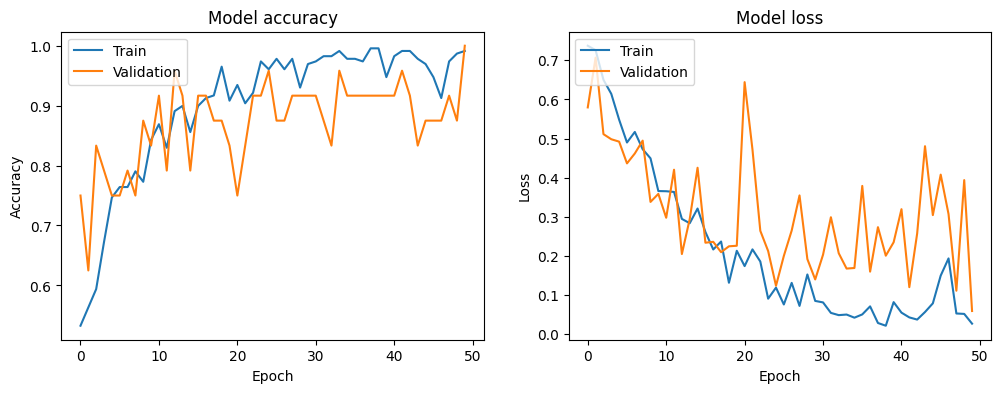

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [33]:
#Input
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y108.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [34]:
# Make a prediction
predictions = model.predict(img_array)

# Get the prediction score (assuming a binary classification with sigmoid activation)
prediction_score = predictions[0][0]

# Determine the class based on the threshold of 0.5
predicted_tumour = "No" if prediction_score > 0.4 else "Yes"

# Print the prediction
print(f'Prediction : {predicted_tumour}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction : Yes


In [35]:
# Predict the class of the image
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])

# Ensure that the class labels match the training generator class indices
class_labels = list(train_generator.class_indices.keys())

# Get the predicted class label
predicted_tumour = class_labels[predicted_class_index]

# Print the prediction and the associated class label
print(f'Predicted probabilities: {predictions[0]}')
print(f'Predicted class index: {predicted_class_index}')
print(f'Prediction: {predicted_tumour}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted probabilities: [4.0714113e-07]
Predicted class index: 0
Prediction: yes


In [36]:
# Sanity check to verify class labels and indices
print(f'Class indices: {train_generator.class_indices}')
print(f'Class labels: {class_labels}')


Class indices: {'yes': 0, 'no': 1}
Class labels: ['yes', 'no']


In [37]:
train_generator.class_indices.keys()

dict_keys(['yes', 'no'])

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(validation_generator) > 0.5).astype('int32')
y_true = validation_generator.classes

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
[[10  5]
 [ 5  4]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.44      0.44      0.44         9

    accuracy                           0.58        24
   macro avg       0.56      0.56      0.56        24
weighted avg       0.58      0.58      0.58        24



In [21]:
from collections import Counter

# Check the balance of the training data
counter = Counter(train_generator.classes)
print(f'Training class distribution: {counter}')

Training class distribution: Counter({0: 140, 1: 89})


In [40]:
# Predict the class of the validation data
y_pred = (model.predict(validation_generator) > 0.5).astype('int32')
y_true = validation_generator.classes

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Print model performance metrics for debugging
print("Model Performance Metrics:")
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())
predicted_tumour = class_labels[predicted_class_index]

print(f'Predicted probabilities: {predictions[0]}')
print(f'Predicted class index: {predicted_class_index}')
print(f'Prediction: {predicted_tumour}')

# Sanity check to verify class labels and indices
print(f'Class indices: {train_generator.class_indices}')
print(f'Class labels: {class_labels}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Confusion Matrix:
[[9 6]
 [5 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        15
           1       0.40      0.44      0.42         9

    accuracy                           0.54        24
   macro avg       0.52      0.52      0.52        24
weighted avg       0.55      0.54      0.55        24

Model Performance Metrics:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted probabilities: [4.0714113e-07]
Predicted class index: 0
Prediction: yes
Class indices: {'yes': 0, 'no': 1}
Class labels: ['yes', 'no']
